In [722]:
import numpy as np
from numpy.linalg import inv, norm
from scipy.linalg import null_space

def dlt_homography(I1pts, I2pts):
    #build a  homography matrix H
    H=np.zeros((9,1))
    A=np.zeros((8,9))
    for i in range(0,4):
        #first row
        A[i*2,0]=-I1pts[0,i]
        A[i*2,1]=-I1pts[1,i]
        A[i*2,2]=-1
        A[i*2,6]=I1pts[0,i]*I2pts[0][i]
        A[i*2,7]=I1pts[1,i]*I2pts[0][i]
        A[i*2,8]=I2pts[0][i]
        # load for second row
        A[i*2+1,3]=-I1pts[0,i]
        A[i*2+1,4]=-I1pts[1,i]
        A[i*2+1,5]=-1
        A[i*2+1,6]=I1pts[0,i]*I2pts[1][i]
        A[i*2+1,7]=I1pts[1,i]*I2pts[1][i]
        A[i*2+1,8]=I2pts[1][i]
      
    b = np.zeros((1,8))
    H=null_space(A)

    #normolize H
    v=H[8]
    H=H/v
    H=np.resize(H,(3,3))
    #H = np.linalg.svd(A, b,full_matrices=True)

    return H, A


In [723]:
 #x, y    
I1pts = np.array([[5, 220, 220,   5],  [1,   1, 411, 411]])
I2pts = np.array([[375, 420, 420, 450], [ 20,  20, 300, 290]])
(H, A) = dlt_homography(I1pts, I2pts)
# Don't forget: the homography operates on homogeneous points!

In [724]:
H

array([[ 3.12437630e-01, -2.54861048e+00,  3.74175814e+02],
       [ 4.95932747e-03, -1.10439788e+00,  2.09830355e+01],
       [ 2.47966373e-04, -6.06812019e-03,  1.00000000e+00]])

In [725]:
import numpy as np
from numpy.linalg import inv

def bilinear_interp(I, pt):
    """
    Performs bilinear interpolation for a given image point.

    Given the (x, y) location of a point in an input image, use the surrounding
    4 pixels to conmpute the bilinearly-interpolated output pixel intensity.

    Note that images are (usually) integer-valued functions (in 2D), therefore
    the intensity value you return must be an integer 
    #(use round()).

    This function is for a *single* image band only - for RGB images, you will 
    need to call the function once for each colour channel.

    Parameters:
    -----------
    I   - Single-band (greyscale) intensity image, 8-bit np.array (i.e., uint8).
    pt  - 2x1 np.array of point in input image (x, y), with subpixel precision.

    Returns:
    --------
    b  - Interpolated brightness or intensity value (whole number >= 0).
    """
    #--- FILL ME IN ---
    y=pt[0,0]
    x=pt[1,0]
    
    # for y, y1 y2
    rounddown=int(round(y-0.5))
    roundup=int(round(y+0.5))
    #for x， x1, x2
    roundleft=int(round(x-0.5))
    roundright=int(round(x+0.5))
    #print(roundup,rounddown,roundleft,roundright)


    pixel_11=I[roundleft,rounddown]
    pixel_12=I[roundleft,roundup]
    pixel_22=I[roundright,roundup]
    pixel_21=I[roundright,rounddown]
  

  
    #R1 = ((x2 – x)/(x2 – x1))*Q11 + ((x – x1)/(x2 – x1))*Q21
    R1=((roundright-x)/(roundright-roundleft))*pixel_11+((x-roundleft)/(roundright-roundleft))*pixel_21
    #R2 = ((x2 – x)/(x2 – x1))*Q12 + ((x – x1)/(x2 – x1))*Q22
    R2= ((roundright-x)/(roundright-roundleft))*pixel_12+((x-roundleft)/(roundright-roundleft))*pixel_22

    #b = ((y2 – y)/(y2 – y1))*R1 + ((y – y1)/(y2 – y1))*R2
    b=((roundup-y)/(roundup-rounddown))*R1+((y-rounddown)/(roundup-rounddown))*R2
    b=int(round(b))

    if pt.shape != (2, 1):
        raise ValueError('Point size is incorrect.')

    #------------------

    return b

In [726]:
pt = np.array([[142.45, 286.73]]).T  # (x, y), where x is first row.

In [828]:
import matplotlib.pyplot as plt
#%matlibplot inline
import numpy as np
from imageio import imread

I  = imread('../501/rob501_fall_2019_project_01/billboard/peppers_grey.png')
#/501/rob501_fall_2019_project_01/billboard/print(type(I))

pt = np.array([[142.45, 286.73]]).T  # (x, y), where x is first row.

b = bilinear_interp(I, pt)
print(b)

112


In [728]:
I.shape

(384, 512)

In [830]:
import numpy as np

def histogram_eq(I):

    # calculate histogram
    hists= np.histogram(I)

    # caculate cdf(cumulative distribution function)
    input_image=I.flatten()
    hists,binedge = np.histogram(I,bins=255,range=(0,255))
    #hists.shape
    hists_cumsum = np.cumsum(hists)
    totalpixel=np.sum(hists)
    #build a point operation function, f
    f = (255*(hists_cumsum)/(totalpixel)) # make sure the array is unit8
    f=np.round(f).astype('uint8')
    # mapping
    J = f[I]


    # Verify I is grayscale.
    if I.dtype != np.uint8:
        raise ValueError('Incorrect image format!')

    #------------------

    return J



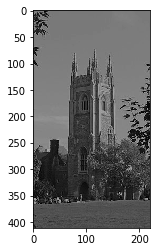

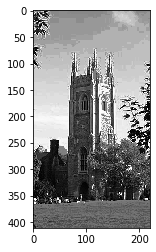

In [833]:
import matplotlib.pyplot as plt
from imageio import imread


I = imread("../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png")
J = histogram_eq(I)

plt.imshow(I, cmap = "gray", vmin = 0, vmax = 255)
plt.show()
plt.imshow(J, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

In [731]:
import matplotlib.pyplot as plt
from imageio import imread
#%matlibplot inline
I = imread("../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png")
#method two
# calculate histogram
hists= np.histogram(I)

# caculate cdf(cumulative distribution function)
input_image=I.flatten()
hists,binedge = np.histogram(I,bins=255,range=(0,255))
#hists.shape
hists_cumsum = np.cumsum(hists)
totalpixel=np.sum(hists)
#build a point operation function, f
f = (255*(hists_cumsum)/(totalpixel)) # make sure the array is unit8
f=np.round(f).astype('uint8')
# mapping
J = f[I]


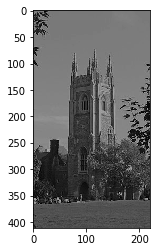

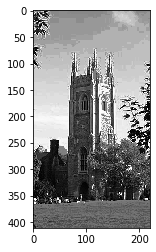

In [735]:
I = imread("../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png")

import matplotlib.pyplot as plt
from imageio import imread


I = imread("../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png")


J = histogram_eq(I)

plt.imshow(I, cmap = "gray", vmin = 0, vmax = 255)
plt.show()
plt.imshow(J, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

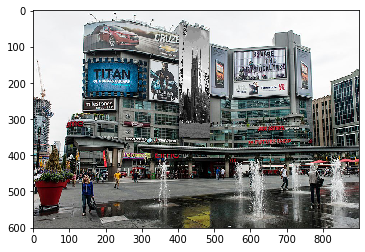

In [984]:
# Bounding box in Y & D Square image.
from matplotlib.path import Path
import numpy as np
from imageio import imread, imwrite

bbox = np.array([[404, 490, 404, 490], [38,  38, 354, 354]])

# Point correspondences.
Iyd_pts = np.array([[416, 485, 488, 410], [40,  61, 353, 349]])
Ist_pts = np.array([[2, 218, 218, 2], [2, 2, 409, 409]])

Iyd = imread('../501/rob501_fall_2019_project_01/billboard/yonge_dundas_square.jpg')
Ist = imread('../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png')

Ihack = np.asarray(Iyd)
Ist = np.asarray(Ist)

#--- FILL ME IN ---

# Let's do the histogram equalization first.
Ist_eq=histogram_eq(Ist)
# Compute the perspective homography we need...

(H, A) = dlt_homography(Iyd_pts, Ist_pts)

# Main 'for' loop to do the warp and insertion - 
# this could be vectorized to be faster if needed!
#bbox [x][y]
#adjust the path a little bit. change the bbox [1,1] plus 20
path = Path([(bbox[0,0],bbox[1,0]),(bbox[0,1],bbox[1,1]+20), (bbox[0,3],bbox[1,3]), (bbox[0,2],bbox[1,2]),
               (bbox[0,0],bbox[1,0])],[Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO,Path.CLOSEPOLY])

#(x, y)  y is the perpendicular coordinate

for y in range(Iyd.shape[0]):
    for x in range(Iyd.shape[1]):
        if path.contains_point([x,y])==1:
            #calculate the coordinate in picture Ist
            [u,v,w]=np.dot(H,[x,y,1])
            [u,v,w]=[u,v,w]/w
            #if (u < Ist.shape[1] and v < Ist.shape[0]):
            if (u < 219 and v < 410):
                Ihack[y,x] = bilinear_interp(Ist_eq, np.array([[u, v]]).T)
  

        
plt.imshow(Ihack)
plt.show()


# You may wish to make use of the contains_points() method
# available in the matplotlib.path.Path class!
#Path.contains_points()


In [965]:
len(Iyd)

601

In [966]:
Iyd.shape

(601, 900, 3)

In [934]:
Ihack[450,50]

array([66, 64, 51], dtype=uint8)

In [858]:
[u,v,c]=np.dot(H,[450,50,1])


In [859]:
print(u,v,c)
[u,v,c]=[u,v,c]/c
print(u,v,c)
a=bilinear_interp(Ist_eq, np.array([[u, v]]).T)
print(a)

74.37411898492303 1.0375854601511492 0.7063431918803179
105.29459310981072 1.4689537211918886 1.0
136


In [865]:
Ihack[450,50]=a

In [866]:
Ihack[450,50].astype(np.uint8)

array([136, 136, 136], dtype=uint8)

In [985]:
# Billboard hack script file.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from imageio import imread, imwrite

from PIL import Image

def billboard_hack():
    """
    Hack and replace the billboard!

    Parameters:
    ----------- 

    Returns:
    --------
    Ihack  - Hacked RGB intensity image, 8-bit np.array (i.e., uint8).
    """
    bbox = np.array([[404, 490, 404, 490], [38, 38, 354, 354]])

    # Point correspondences.
    Iyd_pts = np.array([[416, 485, 488, 410], [40, 61, 353, 349]])
    Ist_pts = np.array([[2, 218, 218, 2], [2, 2, 409, 409]])

    Iyd = imread('../501/rob501_fall_2019_project_01/billboard/yonge_dundas_square.jpg')
    Ist = imread('../501/rob501_fall_2019_project_01/billboard/uoft_soldiers_tower_dark.png')


    Ihack = np.asarray(Iyd)
    Ist = np.asarray(Ist)

    im = Image.fromarray(Iyd)
    im.save("original_image.jpeg")

    # -----------------------------------------------------------------------------------------------------------------#
    # --- FILL ME IN ---
    # Let's do the histogram equalization first.
    Ist_balanced = histogram_eq(Ist)
    Ist_eq = histogram_eq(Ist)


    # Compute the perspective homography we need...
    H, A = dlt_homography(Iyd_pts, Ist_pts)

    # Main 'for' loop to do the warp and insertion -
    # this could be vectorized to be faster if needed!
    #bbox [x][y]
    #adjust the path a little bit. change the bbox [1,1] plus 20
    path = Path([(bbox[0,0],bbox[1,0]),(bbox[0,1],bbox[1,1]+20), (bbox[0,3],bbox[1,3]), (bbox[0,2],bbox[1,2]),
                   (bbox[0,0],bbox[1,0])],[Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO,Path.CLOSEPOLY])

    #(x, y)  y is the perpendicular coordinate

    for y in range(Iyd.shape[0]):
        for x in range(Iyd.shape[1]):
            if path.contains_point([x,y])==1:
                #calculate the coordinate in picture Ist
                [u,v,w]=np.dot(H,[x,y,1])
                [u,v,w]=[u,v,w]/w
                #if (u < Ist.shape[1] and v < Ist.shape[0]):
                if (u < 219 and v < 410):
                    Ihack[y,x] = bilinear_interp(Ist_eq, np.array([[u, v]]).T)


                   
                    
    im = Image.fromarray(Ihack)
    im.save("final_image.jpeg")

    Ihack = Ihack.astype(np.uint8)
    #------------------

    return Ihack


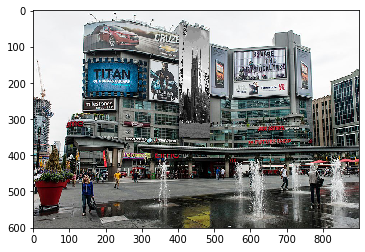

In [986]:

if __name__ == "__main__":
    plt.imshow(billboard_hack())
    plt.show()

In [879]:
len(Iyd)

601

In [881]:
len(Iyd[0])

900

In [924]:
Ist.shape

(411, 220)